NIST Thermometer was last calibrated on 9/19/2013. Its measurement range is -8 to 32°C with 0.1°C gradation.
HOBO Pendant Temperature Logger (UA-001) has a measurement range from -20 to 70°C. It has a resolution of 0.14°C.

Temperature validation test was performed on 6/2/2023 with a total of 85 HOBO pendants in a labotory environment. These pendants were dropped in water a few seconds before temperature readings were taken from the NIST thermometer. The pendants were set up to record at one minute interval. The thermometer readings were taken manually at the same one-minute interval.

Due to the density of these loggers, they were floating in water for the entire duration of the test. To capture how well these loggers react to temperature changes, ice packs were added to the water bath. Constant mixing was performed and maintained the entire time. 

In [1]:
#Import libraries
import pandas as pd
import glob
import re
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

In [2]:
#Import file location
loggerFilePath = r'T:\sxin\Hobo loggers\Validation Test 6.2.23\*.csv'
labReadsFilePath = r'T:\sxin\Hobo loggers\Validation Test 6.2.23\*.xlsx'

In [3]:
#Gather all filepaths needed to do the data import
files = glob.glob(loggerFilePath)
labReadsFile = glob.glob(labReadsFilePath)

In [4]:
#Import lab NIST thermometer readings during validation test
labReads = pd.read_excel(labReadsFile[0])
labReads['Temperature - F'] = labReads['Temperature - C']  * (9/5) + 32
labReads['DateTime'] = pd.to_datetime(labReads['DateTime'])

In [5]:
#Adjust logger record period 
timeStart = labReads['DateTime'][0]
timeEnd = labReads['DateTime'][len(labReads['DateTime'])-1]

In [6]:
#Import temp. logger data
loggerData = {}

for file in files:
    tempdf = pd.read_csv(file, skiprows = 1)
    tempdf = tempdf.iloc[:,1:3]
    tempdf = tempdf.dropna()
    tempdf.iloc[:,0] = pd.to_datetime(tempdf.iloc[:,0])
    tempdf = tempdf[(tempdf['Date Time, GMT-07:00']>=timeStart)&(tempdf['Date Time, GMT-07:00']<=timeEnd)]
    loggerID = tempdf.columns[1]
    loggerID = re.findall('\d{8}',loggerID)[0]

    loggerData[loggerID] = tempdf
    

In [7]:
#Set up plot styles
mpl.rc_file_defaults()
plt.style.use('seaborn')

In [8]:
#Set up plot details
numPerPlot = 5 #adjust the number of loggers to be shown in one plot

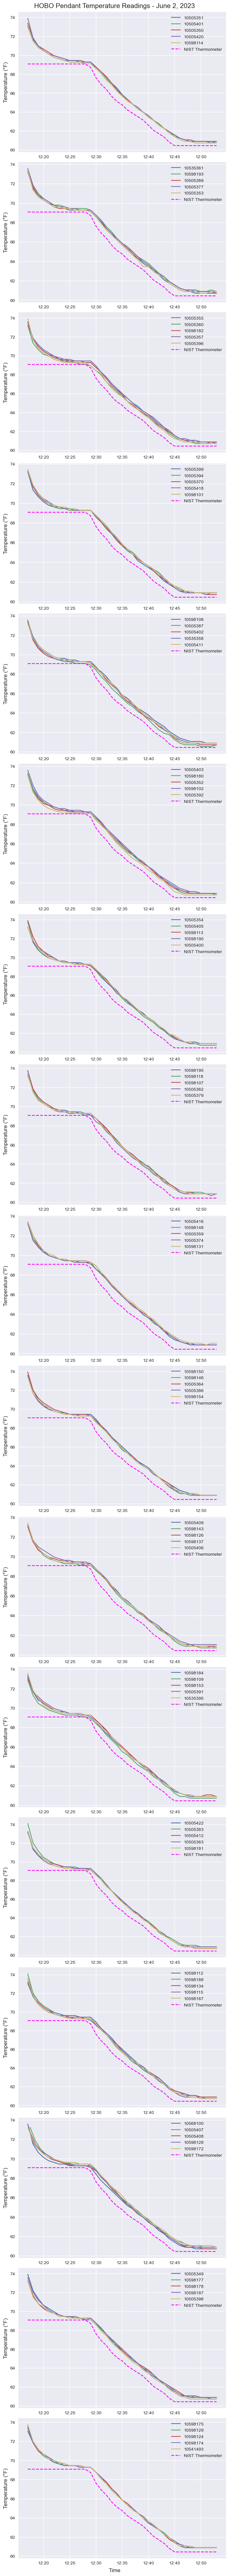

In [10]:
#Make plots
if len(loggerData)%numPerPlot>0:
    nrow = len(loggerData)//numPerPlot + 1
else:
    nrow = len(loggerData)/numPerPlot
nrow = int(nrow)
       
fig, axes = plt.subplots(nrow, 1, constrained_layout=True)

for i, ax in enumerate(fig.axes):
    for j, logger in enumerate(loggerData): 
        x = loggerData[logger].columns[0]
        y = loggerData[logger].columns[1]
        if  j // numPerPlot == i :
            ax.plot(loggerData[logger][x], loggerData[logger][y], label = logger)
            ax.set_ylabel('Temperature (°F)', fontsize=12)
            
        else:
            pass            
    ax.plot(labReads['DateTime'], labReads['Temperature - F'], linestyle = 'dashed', label = 'NIST Thermometer', color = 'magenta')
    ax.legend()        
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.supxlabel('Time', fontsize = 12)
fig.suptitle('HOBO Pendant Temperature Readings - June 2, 2023', fontsize = 15)
fig.set_figheight(80)
fig.set_figwidth(7) 